# Module 19

### 19.5.3   Support Vector Machine Vs. Deep Learning Model


How might the deep learning model compare to support vector machines (SVMs)? Time for Beks to find out.


SVMs are a type of binary classifier that use geometric boundaries to distinguish data points from two separate groups. More specifically, SVMs try to calculate a geometric hyperplane that maximizes the distance between the closest data point of both groups:

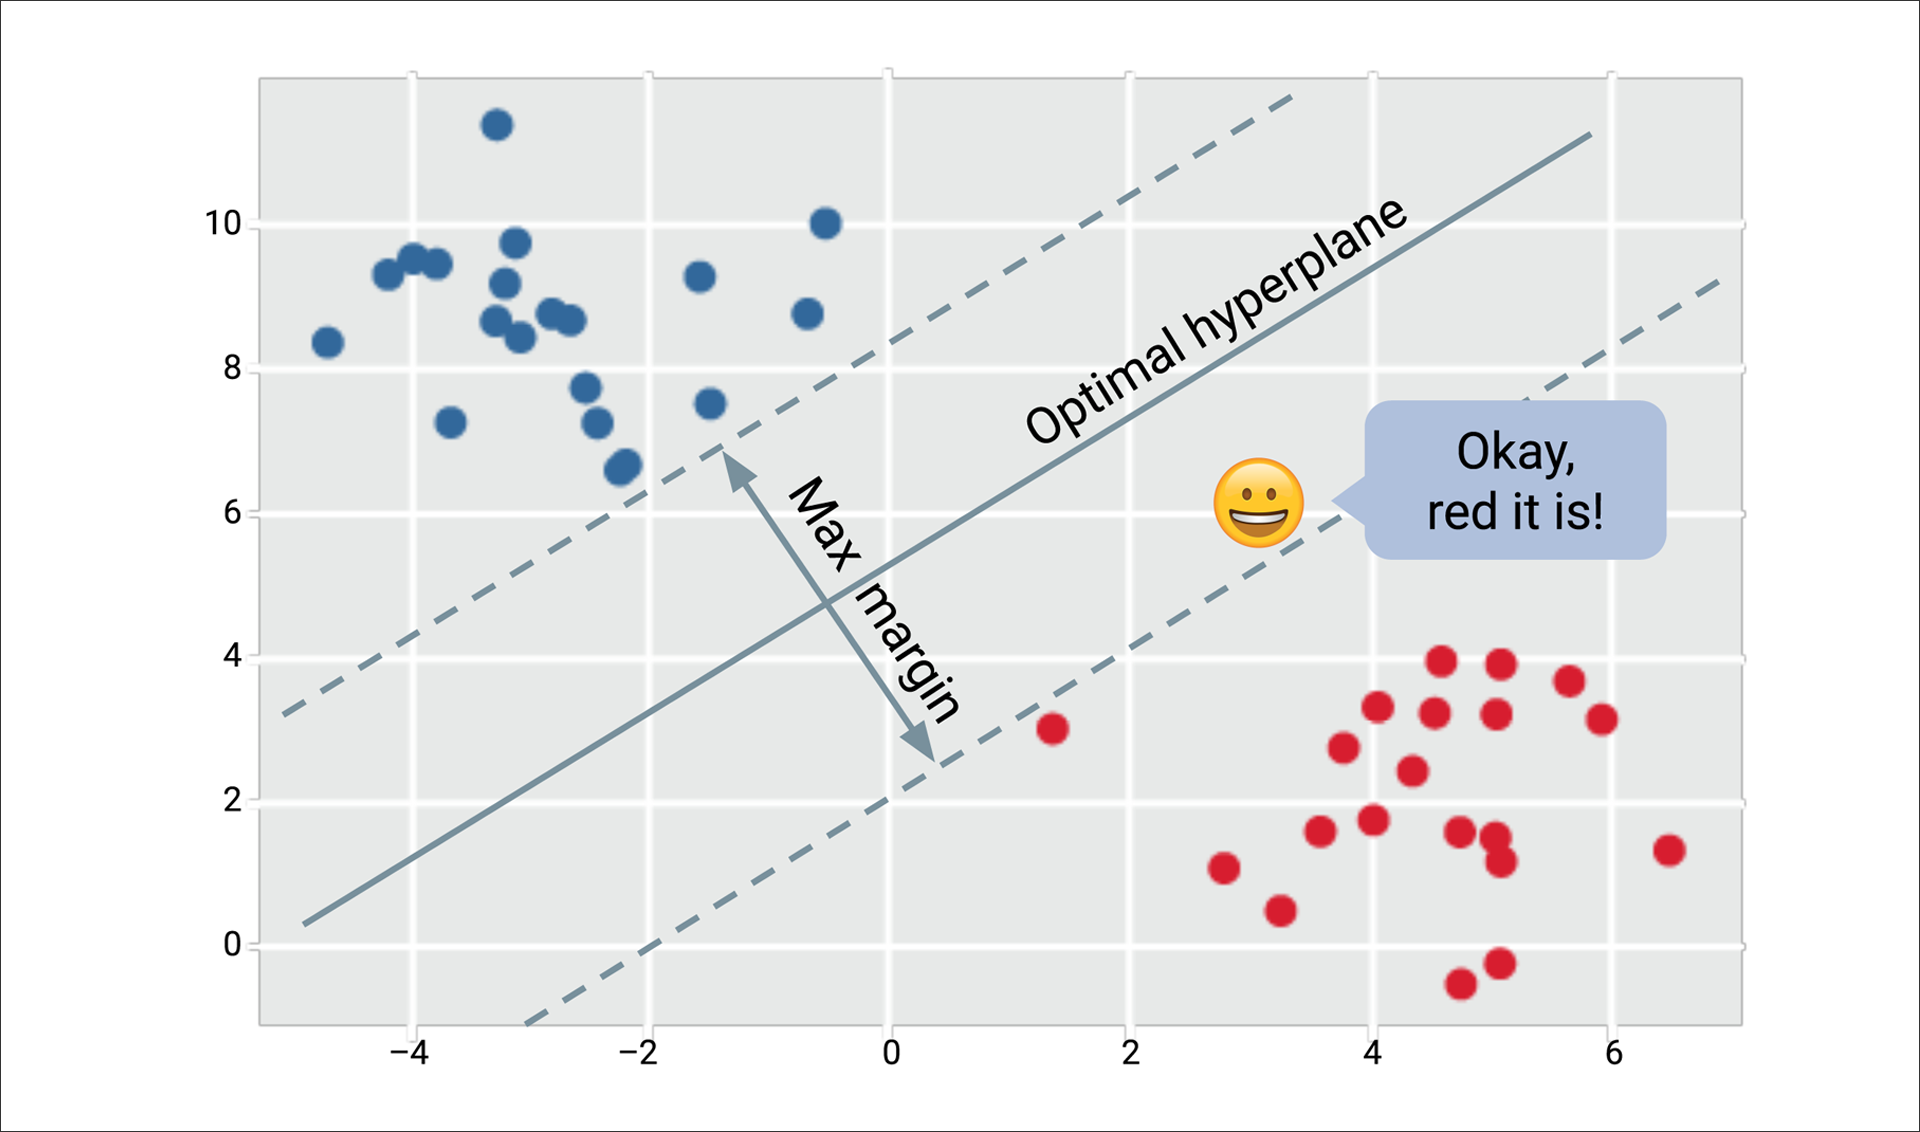
The plot shows an optimal hyperplane, calculated by SVMs.

Unlike logistic regression, which excels in classifying data that is linearly separable but fails in nonlinear relationships, SVMs can build adequate models with linear or nonlinear data. Due to SVMs’ ability to create multidimensional borders, SVMs lose their interpretability and behave more like the black box machine learning models, such as basic neural networks and deep learning models.

SVMs, like neural networks, can analyze and interpret multiple data types, such as images, natural language voice and text, or tabular data. SVMs perform one task and one task very well—they classify and create regression using two groups. In contrast, neural networks and deep learning models are capable of producing many outputs, which means neural network models can be used to classify multiple groups within the same model. Over the years, techniques have been developed to create multiple SVM models side-by-side for multiple classification problems, such as creating multiple SVM kernels. However, a single SVM is not capable of the same outputs as a single neural network.

If we only compare binary classification problems, SVMs have an advantage over neural network and deep learning models:

Neural networks and deep learning models will often converge on a local minima. In other words, these models will often focus on a specific trend in the data and could miss the “bigger picture.”
SVMs are less prone to overfitting because they are trying to maximize the distance, rather than encompass all data within a boundary.
Despite these advantages, SVMs are limited in their potential and can still miss critical features and high-dimensionality relationships that a well-trained deep learning model could find. However, in many straightforward binary classification problems, SVMs will outperform the basic neural network, and even deep learning models with ease.

To compare and contrast the performance of an SVM versus deep learning model, we’ll try to build a binary classifier using the same input data. This adapted real-world dataset (Links to an external site.) contains bank telemarketing metrics that can be used to predict whether or not a customer is likely to subscribe to a banking service after being targeted by telemarketing advertisements. From this dataset, we want to build a binary classifier using an SVM and deep learning model and compare the predictive accuracy of either model.

First, we’ll download the bank telemarketing dataset (bank_telemarketing.csv)Preview the document  and place it in a folder with a new Jupyter Notebook. Next, we’ll make a new Jupyter Notebook and name it “SVM_DeepLearning” (or something similar)—this will help us easily locate the comparison example at another time. Once we have created our notebook and placed the dataset into the corresponding folder, we’ll start by importing our libraries and reading in the dataset.

Copy and run the following code into the notebook:

In [1]:


# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()


,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


The DataFrame shows six columns of bank telemarketing data: Age, Job, Marital_Status, Education, Default_Credit, and Housing_Loan.

Unlike neural networks and deep learning models, SVMs can handle unprocessed and processed tabular data. Regardless, we’ll preprocesses the dataset and use the preprocessed data for training both models—this ensures a fair comparison. For our first preprocessing workflow, let’s encode our categorical variables using Scikit-Learn’s OneHotEncoder class.

First, we must make sure that none of our categorical variables require bucketing. To check this, let’s get the column names of categorical variables and check their number of unique values. Add and run the following code to the notebook:


In [2]:

# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

#data-19-5-3-3-check-number-unique-values-bank-telemarketing-data.png



Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

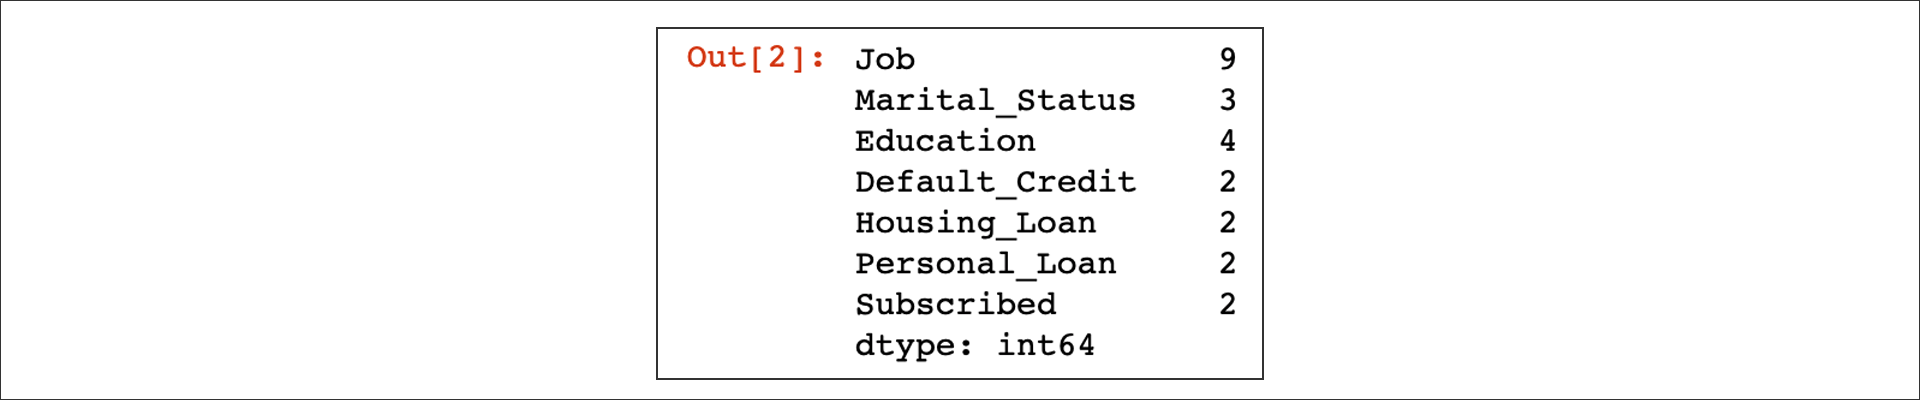

Looking at the number of unique values for each categorical variable, there were no categories that require bucketing prior to encoding. Therefore, we’re ready to encode by adding and running the following code to our notebooks:




In [3]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()


,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


The DataFrame shows five columns of encoded attrition data: Job_admin, Job_blue-collar, Job_entrepreneur, Job_management, and Job_other.

Once we have our encoded categorical variables, we need to merge our encoded columns back into our original DataFrame (as well as remove the unencoded columns). To replace the unencoded categorical variables with the encoded variables, add and run the following code to the notebook:


In [4]:

# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()



,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Use merge and drop to replace unencoded categorical variables in the DataFrame.

Now, we must split our data into the training and testing sets prior to standardization to not incorporate the testing values into the scale—testing values are only for evaluation. To perform the training/test split and standardize our numerical variables, add and run the following code in the notebook:


In [5]:

# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


After standardizing variables in both the training and testing data, our dataset is ready for both models. First, we’ll train and evaluate our SVM.

**REWIND**

SVMs can be built using Scikit-learn’s SVC class in the svm module.
For our purposes, we’ll use the SVM’s linear kernel to try and create a linear boundary between the “Subscribed_yes” versus “Subscribed_no” groups. To create our SVM model and test the performance, add and run the following code:



In [6]:

# Create the SVM model
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")



 SVM model accuracy: 0.873


Looking at the output of our SVM model, the model was able to correctly predict the customers who subscribed roughly 87% of the time, which is a respectable first-pass model. 

Next, we need to compile and evaluate our deep learning model. Again, we’ll use our typical binary classifier parameters:

- Our first hidden layer will have an input_dim equal to the length of the scaled feature data X , 10 neuron units, and will use the relu activation function.
- Our second hidden layer will have 5 neuron units and also will use the relu activation function.

The loss function should be binary_crossentropy, using the adam optimizer.

**NOTE**

Unlike our basic neural network model, we don’t want to use two to three times the number of neurons as input variables—we don’t want our deeper layers to overfit the input data.

To build and compile our deep learning model, we must add and run the following code:



In [7]:
len(X_train_scaled[0])

23

In [8]:

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


Lastly, we need to train and evaluate our deep learning model. 

Because this dataset contains fewer features than other datasets we have used previously, we only need to train over a maximum of 50 epochs. 

Again, we must add and run the following code:


In [9]:

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 22857 samples
Epoch 1/50
22857/22857 [==============================] - 2s 84us/sample - loss: 0.4172 - accuracy: 0.8533
Epoch 2/50
22857/22857 [==============================] - 1s 43us/sample - loss: 0.3716 - accuracy: 0.8733
Epoch 3/50
22857/22857 [==============================] - 1s 43us/sample - loss: 0.3695 - accuracy: 0.8732
Epoch 4/50
22857/22857 [==============================] - 1s 44us/sample - loss: 0.3686 - accuracy: 0.8734
Epoch 5/50
22857/22857 [==============================] - 1s 44us/sample - loss: 0.3677 - accuracy: 0.8733
Epoch 6/50
22857/22857 [==============================] - 1s 45us/sample - loss: 0.3672 - accuracy: 0.8735
Epoch 7/50
22857/22857 [==============================] - 1s 44us/sample - loss: 0.3668 - accuracy: 0.8733
Epoch 8/50
22857/22857 [==============================] - 1s 44us/sample - loss: 0.3665 - accuracy: 0.8735
Epoch 9/50
22857/22857 [==============================] - 1s 44us/sample - loss: 0.3660 - accuracy: 0.8734
Epoch 10/50
22

Looking at the results of our comparative analysis, the SVM and deep learning models both achieved a predictive accuracy around 87%. 

Additionally, both models take similar amounts of time to train on the input data. 

The only noticeable difference between the two models is implementation—the amount of code required to build and train the SVM is notably less than the comparable deep learning model. 

As a result, many data scientists will prefer to use SVMs by default, then turn to deep learning models, as needed.
